In [1]:
import random
import math
import time
import json
import os
from numba import jit

import numpy as np
from tqdm import tqdm
from PIL import Image

## read image

In [2]:
img = np.array(Image.open("./lab3_data/mona-lisa-damaged.png"))[:, :, 0]
m, n = img.shape
print(img.shape)
C = np.array([0, 64, 128, 192, 255])

(252, 480)


In [3]:
L = np.zeros((m, n, len(C)), dtype=np.float64)
U = np.zeros((m, n, len(C)), dtype=np.float64)
D = np.zeros((m, n, len(C)), dtype=np.float64)
R = np.zeros((m, n, len(C)), dtype=np.float64)
######
phi = np.zeros((m, n, len(C)))

g = np.zeros((len(C), len(C)))
for i in range(len(C)):
    for j in range(len(C)):
        g[i, j] = abs(C[i] - C[j])


q = np.zeros((m, n, len(C)))
def call_q(i, j, k):
    if img[i, j] != 0:
        return abs(img[i, j] - C[k])
    else:
        return 0
for i in range(m):
    for j in range(n):
        for c in range(len(C)):
            q[i, j, c] = call_q(i, j, c)

#####
@jit(nopython=True)
def update_left(i, j, k, direction, phi, C):
    values = np.zeros((len(C),), dtype=np.float32)
    for k_ in range(len(C)):
        values[k_] = direction[i, j-1, k_] + 0.5*q[i, j-1, k_] - phi[i, j-1, k_] + g[k_, k]
    #print(values.max())
    return values.max()

@jit(nopython=True)
def update_upper(i, j, k, direction, phi, C):
    values = np.zeros((len(C),), dtype=np.float32)
    for k_ in range(len(C)):
        values[k_] = direction[i-1, j, k_] + 0.5*q[i-1, j, k_] + phi[i-1, j, k_] + g[k_, k]
    return values.max()

#####
@jit(nopython=True)
def update_right(i, j, k, direction, phi, C):
    values = np.zeros((len(C),), dtype=np.float32)
    for k_ in range(len(C)):
        values[k_] = direction[i, j+1, k_] + 0.5*q[i, j+1, k_] - phi[i, j+1, k_] + g[k_, k]
    return values.max()


@jit(nopython=True)
def update_down(i, j, k, direction, phi, C):
    values = np.zeros((len(C),), dtype=np.float32)
    for k_ in range(len(C)):
        values[k_] = direction[i+1, j, k_] + 0.5*q[i+1, j, k_] + phi[i+1, j, k_] + g[k_, k]
    return values.max()


####
def restore_k(i, j, C):
    values = list()
    for k_ in range(len(C)):
        values.append(L[i, j, k_] + R[i, j, k_] + q[i, j, k_] - phi[i, j, k_])
    return C[values.index(max(values))]

## 10 steps of trw-s

In [4]:
for i in reversed(range(0, m-1)):
    for j in reversed(range(0, n-1)):
        for c in range(len(C)):
            R[i, j, c] = update_right(i, j, c, R, phi, C)
            D[i, j, c] = update_down(i, j, c, D, phi, C)

In [9]:
for iteration in tqdm(range(1)):
    # forward
    for i in range(0, m-1):
        for j in range(1, n):
            for c in range(len(C)):
                L[i, j, c] = update_left(i, j, c, L, phi, C)
                U[i, j, c] = update_upper(i, j, c, U, phi, C)
                phi[i, j, c] = (L[i, j, c] + U[i, j, c] - R[i, j, c] - D[i, j, c])/2

    # backward
    for i in reversed(range(0, m-1)):
        for j in reversed(range(0, n-1)):
            for c in range(len(C)):
                R[i, j, c] = update_right(i, j, c, R, phi, C)
                D[i, j, c] = update_down(i, j, c, D, phi, C)
                phi[i, j, c] = (L[i, j, c] + U[i, j, c] - R[i, j, c] - D[i, j, c])/2


  0%|          | 0/1 [00:00<?, ?it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


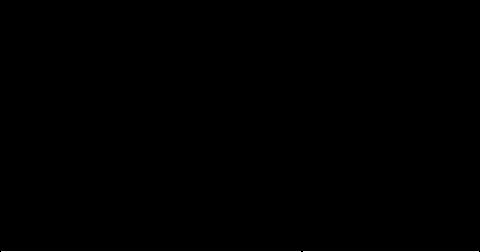

In [6]:
new_img = np.zeros((m, n), dtype=np.uint8)
for i in range(0, m):
    for j in range(1, n-1):
        new_img[i, j] = restore_k(i, j, C)
Image.fromarray(new_img)

In [7]:
R[46, 5, 2]

nan